# Ausführliche Diskussion des Wärmeleitungsgleichungs-Beispiels der Vorlesung

Wir betrachten die folgende Aufgabe: Ein Stab der Länge $\pi$ (auf dem Zahlenstrahl von $0$ bis $\pi$) wird an den Rändern auf $0$ Grad abgekühlt. Auf dem Intervall von $\pi/4 \ldots 3 \pi/4$ wird durch eine Kerze erwärmt (Energiezufuhr $q(x)$ an der Stelle $x$). Die Temperatur am Anfang sei $u_0$. Berechne die Temperatur $T(x,t)$ an der Stelle $x\in[0,\pi]$ zum Zeitpunkt $t\in{\mathbb R}^{\geq 0}$. Wir definieren zunächst die Funktion $q$.

Text(0.5, 1.0, 'Wärmezufuhr q(x)')

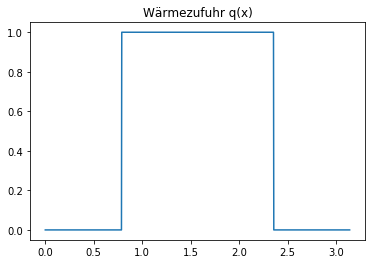

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  
import numpy as np  
import math

def q(x):
    if ((x>math.pi/4) & (x<3*math.pi/4)):
        return 1;
    return 0;

x=np.array(range(0,1000))/1000.*math.pi;
y=np.array(list(map(q,x)))
plt.plot(x,y)
plt.title('Wärmezufuhr q(x)')

## Herleitung der Wärmeleitungsgleichung

Wir zeigen zunächst, dass $T$ eine Differentialgleichung erfüllt. Wir werden dazu eine (nicht bewiesene) physikalische Annahme benutzen, das Fouriersche Gesetz. Dies ist nur eine unvollständige Rechnung, eine komplette bekommen Sie in der Vorlesung Modellierung.

Es sei $[a,b]$ ein beliebiges Teilintervall von $[0,\pi]$ und zunächst mal fest, und seien $t_1>t_0\geq 0$ zwei beliebige Zeitpunkte. Die Wärmeenergie zum Zeitpunkt $t>0$ in diesem Intervall sei definiert durch
$$Q(t)=\int_a^b T(x,t) \mbox{dx}.$$
Damit gilt für die Änderung der Wärmeenergie im Zeitraum $[t_1,t_2]$

\begin{align*}
 Q(t_2)-Q(t_1)&=\int_a^b T(x,t_2)-T(x,t_1) \mbox{dx}\\
  &=\int_a^b \int_{t_0}^{t_1} \frac{d}{dt} T(x,t) \,\mbox{dt}\mbox{dx}\\
  &=I_1
\end{align*}

Nach Fourier's Gesetz bleibt die Wärmeenergie kostant, es sei denn, sie fließt zu den Seiten ab oder es wird Energie hinzugefügt. Der Energiefluß in einem Punkt ist dabei proportional zur negativen Ableitung in diesem Punkt. $T'(x,t)=0$ bedeutet, dass rechts von $x$ die gleiche Temperatur herrscht wie links, es findet kein Energiefluß statt. $T'(x,t)>0$ bedeutet, dass die Temperatur rechts höher ist als links, es findet ein Energiefluß von rechts nach links statt usw. Sei $K$ dieser Proportionalitätsfaktor, und sei $q(x)$ die Wärmeenergie, die unsere Kerze hinzufügt. Dann gilt

\begin{align*}
 Q(t_2)-Q(t_1)&=\int_{t_1}^{t_2} K \frac d {dx} T(b,t) - K \frac d {dx} T(a,t) dt+\int_a^b \int_{t_0}^{t_1} q(x) \,\mbox{dt}\mbox{dx}\\
 &=\int_a^b \int_{t_0}^{t_1} K \frac{d^2}{dx^2} T(x,t) + q(x) \,\mbox{dt}\mbox{dx}\\
 &=I_2
\end{align*}

Der Einfachheit halber setzen wir $K=1$.

Wir lassen nun $b$ gegen $a$ konvergieren und $t_1$ gegen $t_0$. Nach dem Mittelwertsatz der Integralrechnung  
$$\frac 1 {(t_1-t_0)(b-a)} I_0 \xrightarrow{b\mapsto a,\,t_1\mapsto t_0} \frac d {dt} T(a,t_0)$$  
und entsprechend
$$\frac 1 {(t_1-t_0)(b-a)} I_0 \xrightarrow{b\mapsto a,\,t_1\mapsto t_0} \frac {d^2}{dx^2}T(a,t_0)+q(a).$$  

Da $I_0=I_1$ und $a$ und $t_0$ beliebig waren, gilt für alle $x\in[0,\pi]$ und alle $t\in\mathbb R^+$
$$\frac d {dt} T(x,t)= \frac {d^2}{dx^2}T(x,t)+q(x).$$

Weiter gelten nach Voraussetzung für $t>0$, $x\in[0,\pi]$ die Randbedingungen
$$T(a,t)=0,\,T(b,t)=0,\,T(x,0)=u_0(x).$$

Man kann zeigen, dass hierdurch die Funktion $T$ bereits eindeutig charakterisiert ist (Vorlesung Partielle Differentialgleichungen). 

## Stationäre Wärmeleitungsgleichung

Wir wenden uns aber zunächst einem einfacheren Problem zu. Wir werden erwarten, dass sich in unserem Versuch nach sehr kurzer Zeit eine Temperaturverteilung $u(x,t)$ einstellt, die sich nicht mehr ändert. Es gilt für diese Verteilung also $\frac d {dt} u(x,t)=0$. Eingesetzt in die Differentialgleichung bedeutet dies, dass
$$0= \frac {d^2}{dx^2}u(x,t)+q(x).$$
Da $u$ gar nicht mehr von $t$ abhängt, können wir den Parameter auch gleich weglassen, und erhalten
$$-u''(x)=q(x),\, u(0)=u(\pi)=0.$$

## Analytische Lösung der stationären Gleichung durch eine Fourierreihe

Um $u$ zu berechnen, müssen wir also $-q$ zweimal integrieren und dabei die Integrationskonstanten so wählen, dass die Randbedingung erfüllt ist.

Hierzu untersuchen wir zunächst den Operator $-''$, also die negative zweite Ableitung. Die Funktion $u_k(x)=\sin (kx)$ ist eine Eigenfunktion dieses Operator zum Eigenwert $k^2$, denn
$$-u_k''(x)=k^2 \sin (kx)=k^2 u_k(x).$$

Falls wir es schaffen, $q(x)$ als Summe der $u_k(x)$ zu schreiben, können wir die Lösung $u$ sofort angeben. Sei nämlich
$$q(x)=\sum_{k>0} a_k \sin(kx).$$

Dann setzen wir $$u(x)=\sum_{k>0} \frac {a_k}{k^2} \sin(kx)$$. Es gilt $u(0)=u(\pi)=0$, und
$$-u''(x)=\sum_{k>0} \frac {a_k} {k^2} k^2 \sin(kx)=q(x).$$

Falls wir also $a_k$ berechnen können, so können wir auch eine Lösung der Gleichung angeben. Dies tun wir mit Hilfe der Analysis 1. Zunächst erweitern wir durch die Definition 
$$q(-x):=-q(x),\,x\in[0,\pi]$$
den Definitionsbereich von $q$ auf $[-\pi,\pi]$ (siehe Bild).

Text(0.5, 1.0, 'Ungerade Fortsetzung von $q$')

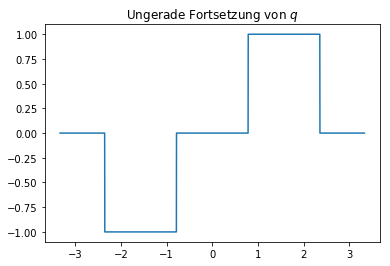

In [2]:
def q(x):
    if (x<0):
        return -q(-x)        
    if ((x>math.pi/4) & (x<3*math.pi/4)):
        return 1;
    return 0;

x=np.array(range(-1000,1000))/300.;
y=list(map(q,x))
plt.plot(x,y)
plt.title('Ungerade Fortsetzung von $q$')

Für Funktionen auf $[0,\pi]$ können wir die Fourierreihe von $q$ berechnen. Da $q$ eine ungerade Funktion ist, fallen die Reihenterme für den Cosinus weg. Wir erhalten also
$$q(x)=\sum_{k>0} a_k \sin(kx)$$
mit $$a_k=\frac 1 \pi \int_{-\pi}^\pi q(x) \,\mbox{dx}.$$

Für unser $q$ erhalten wir sofort durch Einsetzen
$$a_k=\frac 1 \pi \int _{-\frac 3 4 \pi}^{-\pi/4} -\sin(kx) \,\mbox{dx}+\frac 1 \pi \int _{\pi/4}^{\frac 3 4 \pi} \sin(kx) \,\mbox{dx}$$ oder
$$a_k=\frac 2 \pi \int_{\pi/4}^{\frac 3 4 \pi} \sin(kx) \mbox{dx}=-[\frac 2 {k\pi} \cos(kx)]_{\pi/4}^{\frac 3 4 \pi}.$$

Ob diese Rechnung stimmt, wollen wir sofort numerisch testen. Zunächst berechnen wir die $a_k$ für $k<N$.

Text(0.5, 1.0, 'Approximation von $q$ durch eine Fourierreihe mit 1024 Folgegliedern')

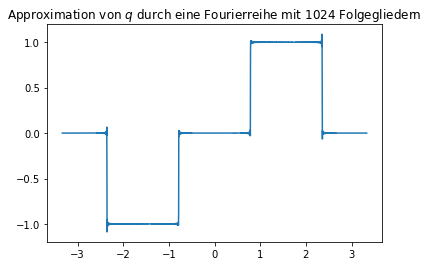

In [3]:
N=1024
a=np.zeros(N)
for k in range(1,N):
    a[k]=-2/(k*math.pi)*(math.cos(k*3*math.pi/4)-math.cos(k*math.pi/4))
def fourierreihe(x):
    sum=0
    for k in range(1,N):
            sum=sum+a[k]*math.sin(k*x)
    return sum

y=list(map(fourierreihe,x))
plt.plot(x,y)
plt.title('Approximation von $q$ durch eine Fourierreihe mit '+str(N)+' Folgegliedern')

Wunderbar - wir sehen zwar, dass die Reihe nicht exakt ist (denn unser $N$ war endlich), aber wir erzielen eine gute Approximation. Jetzt können wir leicht die gesuchte Funktion $u$ berechnen mit unserer Formel oben, im Bereich $[0,\pi]$.

Text(0.5, 1.0, 'Lösung mit analytischem Reihenansatz und 1024 Folgegliedern')

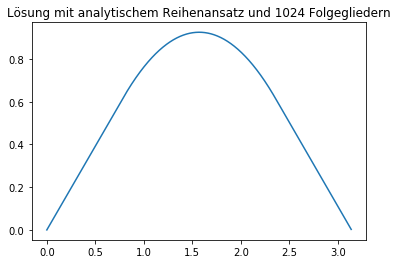

In [4]:
def u(x):
    sum=0
    for k in range(1,N):
            sum=sum+a[k]*math.sin(k*x)/(k*k)
    return sum

x=np.array(range(0,1000))*math.pi/1000;
y=list(map(u,x))
plt.plot(x,y)
plt.title('Lösung mit analytischem Reihenansatz und '+ str(N) + ' Folgegliedern')

## Diskrete Lösung der stationären Wärmeleitungsgleichung

Bei dieser Lösung haben wir vorher sehr viel gerechnet. Können wir dieses Ergebnis auch einfacher, d.h. einfach durch diskretisieren, durch Beschränkung auf endlich viele Punkte erzielen? Wir fahren fort wie in der Vorlesung. 

Immer noch geht es um eine Lösung der Gleichung $$u''(x)=-q(x),\,u(0)=u(\pi)=0.$$

Wir verteilen zunächst $M$ Punkte mit gleichem Abstand im Intervall $[0,\pi]$, also $x_k=kh$, $h=\pi/M$. Wir wollen die Werte der gesuchten Funktion nur noch an den Stellen $x_k$ berechnen, oder besser - Näherungen $u_k$ dafür. Es soll also gelten
$$u_k\sim u(x_k).$$

In der Differentialgleichung ersetzen wir jetzt die zweite Ableitung durch die Näherung
$$-q(x_k)=u''(x_k)\sim \frac{u(x_k+h)-2u(x_k)+u(x_k-h)}{h^2}.$$
Setzen wir nun $u_k$ ein, so ergibt sich
$$-h^2 q(x_k)=u_{k+1}-2u_k+u_{k-1}$$

für $k=1\ldots M-1$ und $u_0=u_M=0$. In Matrixschreibweise ergibt dies das Gleichungssystem
$$Au=q$$
mit 
$$A=\begin{pmatrix}
-2&1\\1&-2&1\\&\ddots&\ddots&\ddots\\
&&1&-2&1\\
&&&1&-2
\end{pmatrix},\,u=\begin{pmatrix}-u_1\\
\vdots\\
-u_{M-1}\end{pmatrix},\,q=\begin{pmatrix}-q(x_1)\\
\vdots\\
-q(x_{M-1})
\end{pmatrix}.$$ 

Dies realisieren wir jetzt auf möglichst einfache Art in python und benutzen dann die Funktionen zur Lösung eines Gleichungssystems. Zunächst schreiben wir eine kleine Funktion, die die Matrizen und Vektoren $A$, $x$ und $q$ bildet.

In [5]:
def setup_gls(M):
    h=math.pi/M
    x=np.array(range(1,M))/M*math.pi
    A=np.zeros([M-1,M-1])
    for k in range(0,M-1):
        A[k,k]=-2
    for k in range(1,M-1):
        A[k-1,k]=1
        A[k,k-1]=1
    qvec=-np.array(list(map(q,x)))*h*h
    return (A,x,qvec,h)

M=5
[A,x,qvec,h]=setup_gls(M)
print(A)
print(qvec)
print(x)

[[-2.  1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  1. -2.]]
[ 0.         -0.39478418 -0.39478418  0.        ]
[0.62831853 1.25663706 1.88495559 2.51327412]


Zur Lösung des Gleichungssystems nutzen wir die numpy-Funktion solve. Später werden wir uns das natürlich genauer anschauen.

Text(0.5, 1.0, 'Lösung mit 5 Diskretisierungspunkten')

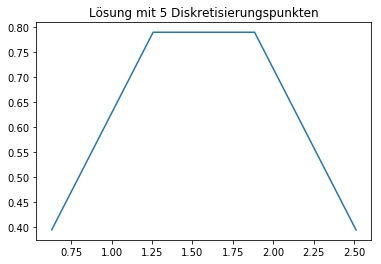

In [6]:
uvec=np.linalg.solve(A,qvec)
plt.plot(x,uvec)
plt.title('Lösung mit '+str(M)+' Diskretisierungspunkten')

Das sieht nicht so toll aus... Aber wir hatten ja auch nur $M=5$. Jetzt mal mit etwas größerer Auflösung.

Text(0.5, 1.0, 'Diskrete Lösung mit 1024 Diskretisierungspunkten')

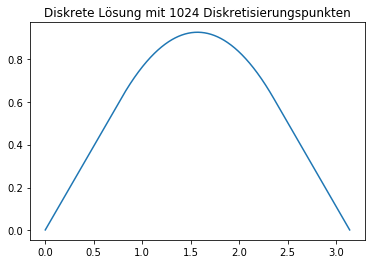

In [7]:
M=1024
[A,x,qvec,h]=setup_gls(M)
uvec=np.linalg.solve(A,qvec)
plt.plot(x,uvec)
plt.title('Diskrete Lösung mit ' + str(M) + ' Diskretisierungspunkten')

Das sieht deutlich besser aus... Wir plotten daher die oben bereits ausgerechnete Lösung, diese Lösung und ihre Differenz in ein Bild.

Text(0.5, 1.0, 'Vergleich der beiden Lösungsansätze')

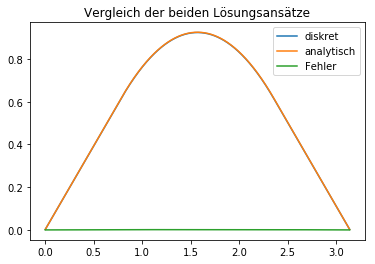

In [8]:
u1=np.array(list(map(u,x)))
plt.plot(x,uvec,x,u1,x,abs(u1-uvec))
plt.legend(['diskret','analytisch','Fehler'])
plt.title('Vergleich der beiden Lösungsansätze')

Der Fehler ist praktisch Null, um ihn zu sehen, müssen wir den Logarithmus plotten. Der maximale Fehler beträgt ungefähr $10^{-3}$.

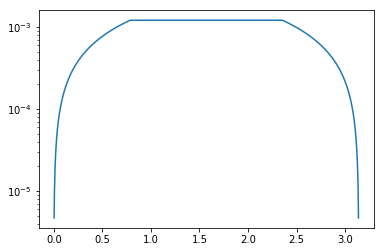

In [9]:
plt.semilogy(x,abs(u1-uvec))

Aufgabe: Spielen Sie mit der Anzahl der Diskretisierungspunkte.

## Diskrete Lösung der zeitabhängigen Wärmeleitungsgleichung

Wir wollen nun noch einen dritten Ansatz ausprobieren. Alternativ hätten wir natürlich auch die echte Wellengleichung nehmen und die Funktion $T$ berechnen können. $T$ ist eine zweidimensionale Funktion, d.h. wir müssen sowohl in $t$ als auch in $x$ diskretisieren, d.h. die Ableitung durch Näherungen ersetzen. Dies geht grundsätzlich genauso, ich gebe hier aber nur das Programm an.

Stabilitätskonstante <1/2: 0.20750578409950776


Text(0.5, 1.0, 'Berechnung des Zustands nach endlicher Zeit mit der Wärmeleitungsgleichung')

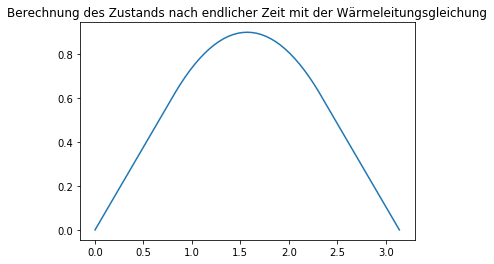

In [10]:
def compute_solution_in_time(M, timesteps, endtime=5, u0=0):
    h=math.pi/M
    dt=endtime/timesteps
    print('Stabilitätskonstante <1/2: '+str(dt/(h*h)))
    T=np.zeros([timesteps,M+1])
    x=np.array(range(0,M+1))/M*math.pi
    qvec=np.array(list(map(q,x)))
    T[1]=u0
    
    for k in range(0,timesteps-1):
        for j in range(1,M):
            T[k+1,j]=T[k,j]+dt*(qvec[j]+(T[k,j-1]-2*T[k,j]+T[k,j+1])/(h*h))
    return (x,T);  

timesteps=10000
M=64
[xtime,T]=compute_solution_in_time(M,timesteps)
utime=T[timesteps-1]
plt.plot(xtime,utime)
plt.title('Berechnung des Zustands nach endlicher Zeit mit der Wärmeleitungsgleichung')

Das sieht ja schon mal gar nicht schlecht aus. Wir vergleichen wieder alle unsere Methoden.

Text(0.5, 1.0, 'Vergleich der drei Lösungsansätze')

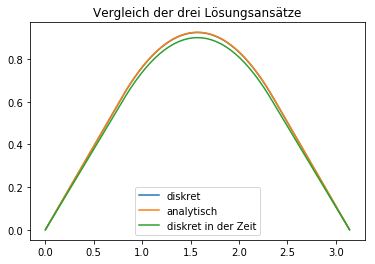

In [11]:
u1=np.array(list(map(u,x)))
plt.plot(x,uvec,x,u1,xtime,utime)
plt.legend(['diskret','analytisch','diskret in der Zeit'])
plt.title('Vergleich der drei Lösungsansätze')

Wir sehen, dass auch die Diskretisierung der zeitabhängigen Gleichung ein vernünftiges Ergebnis liefert. Es ist nicht wirklich gut, denn wir hätten noch etwas warten müssen, bis sich der Endzustand einstellt.

Aufgabe: Spielen Sie mit den Parametern, um eine bessere Approximation zu bekommen.

Dass diese Methode tatsächlich ein gutes Ergebnis liefert, lernen Sie in der Vorlesung Numerik partieller Differentialgleichungen.

Sie könnten nun den Eindruck gewonnen haben: Falls man ein numerisches Problem hat, so muss man nur irgendwie diskretisieren, und heraus kommt das zugehörige numerische Verfahren, und irgendwie liefert das dann ein gutes Ergebnis. 

**Das ist grob falsch.**

Tatsächlich muss man die Methoden genau untersuchen, um Aussagen über die Qualität zu machen. Ein sehr warnendes Beispiel bekommen wir durch eine Modifikation der Diskretisierung der zeitabhängigen Gleichung. Wir erhöhen dazu die Zahl der Diskretisierungspunkte für $x$.

In [12]:
timesteps=10000
M=128
[xtime,T]=compute_solution_in_time(M,timesteps)
utime=T[timesteps-1]
T[100]

Stabilitätskonstante <1/2: 0.830023136398031


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


array([ 0.00000000e+00, -6.48830667e+27,  1.41288737e+28, -2.41963173e+28,
        3.82114592e+28, -5.80671295e+28,  8.61543653e+28, -1.25484571e+29,
        1.79799675e+29, -2.53658482e+29,  3.52483712e+29, -4.82551321e+29,
        6.50902245e+29, -8.65157494e+29,  1.13322126e+30, -1.46286375e+30,
        1.86118594e+30, -2.33398221e+30,  2.88503201e+30, -3.51536824e+30,
        4.22258393e+30, -5.00024930e+30,  5.83751519e+30, -6.71897429e+30,
        7.62483823e+30, -8.53146536e+30,  9.41224389e+30, -1.02387991e+31,
        1.09824573e+31, -1.16158668e+31,  1.21146497e+31, -1.24589483e+31,
        1.26347296e+31, -1.26347296e+31,  1.24589483e+31, -1.21146497e+31,
        1.16158668e+31, -1.09824573e+31,  1.02387991e+31, -9.41224389e+30,
        8.53146536e+30, -7.62483823e+30,  6.71897430e+30, -5.83751521e+30,
        5.00024935e+30, -4.22258403e+30,  3.51536846e+30, -2.88503249e+30,
        2.33398321e+30, -1.86118802e+30,  1.46286797e+30, -1.13322972e+30,
        8.65174114e+29, -

Für $M=128$ bekommen wir direkt eine Python-Warnung. Schauen wir uns den Vektor an, so stellen wir fest, dass die Werte von $-10^{30}$ bis $10^{30}$ gehen, also beim besten Willen keine Approximation an die Lösung sind. Genaue Untersuchung des Algorithmus ergibt, dass wir nur eine gute Näherung erhalten, falls $\frac {dt} {h^2}<\frac 1 2$. Dies ist hier nicht der Fall.